In [1]:
root_path = r"E:\data_share_ths\dataset\CelebAMask-HQ\CelebAMask-HQ"

In [2]:
img_path = root_path+"\\CelebA-HQ-img"

In [3]:
anno_path = root_path+"\\CelebAMask-HQ-mask-anno"

In [4]:
mapping_path = root_path+"\\CelebA-HQ-to-CelebA-mapping.txt"

In [5]:
import os
anno_paths = []
anno_ids = []
parts = []
image_names = []

for cur_folder in os.listdir(anno_path):
    cur_path = anno_path+"\\"+cur_folder
    for img_name in os.listdir(cur_path):
        face_id,face_part  = "",""
        temps = img_name.split("_")
        if len(temps) == 2:
            face_id,face_part = temps[0],temps[1]
        else:
            face_id,face_part = temps[0],temps[1]+"_"+temps[2]
        
        anno_paths.append(cur_path+"\\"+img_name)
        anno_ids.append(face_id)
        parts.append(face_part.split(".")[0])
        image_names.append(img_name)

In [6]:
dist_parts = set(parts)
print(len(dist_parts))
dist_parts

18


{'cloth',
 'ear_r',
 'eye_g',
 'hair',
 'hat',
 'l_brow',
 'l_ear',
 'l_eye',
 'l_lip',
 'mouth',
 'neck',
 'neck_l',
 'nose',
 'r_brow',
 'r_ear',
 'r_eye',
 'skin',
 'u_lip'}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

In [8]:
import cv2
def read_image(img_pathList):
    temp = []
    for cur_path in img_pathList:
        img = cv2.imread(cur_path)
        temp.append(img)
    return temp

### types of parts in dataset

In [9]:
distParts_images = []
for curPart in dist_parts:
    for curImgname,curPath in  zip(image_names,anno_paths):
        if curPart in curImgname:
            distParts_images.append(curPath)
            break
              

In [10]:
import random


In [11]:
def plotImages(image_list,image_names):
    fig = plt.figure(figsize=(12, 12))
    cols = 5
    rows = int(len(image_list)/cols)
    for i in range(1, rows*cols):
        fig.add_subplot(rows, cols, i).set_title(image_names[i])
        plt.axis('off')
        plt.imshow(image_list[i])
    
    plt.show()

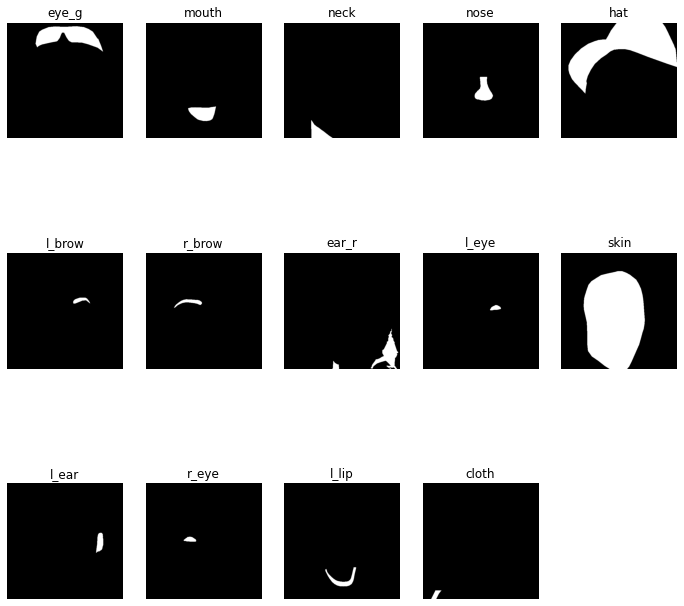

In [12]:
part_imgs = read_image(distParts_images)

plotImages(part_imgs,list(dist_parts))



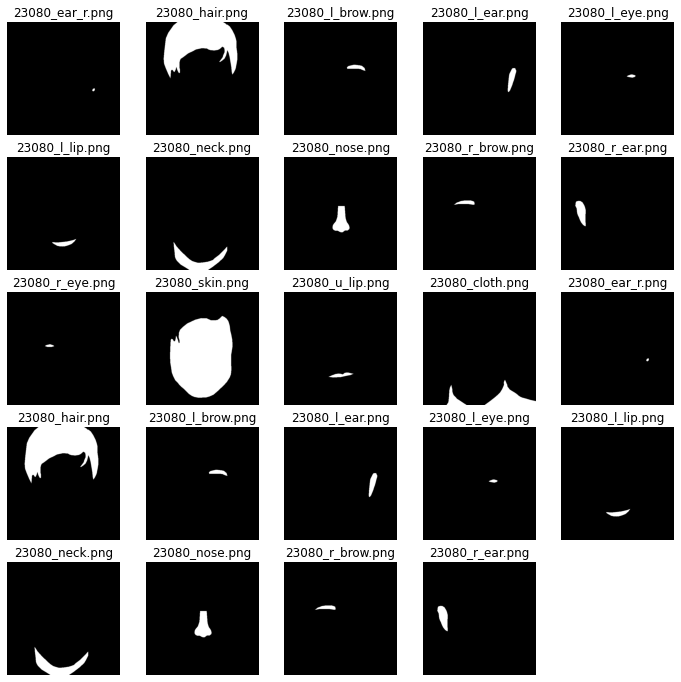

Random Id :  23080


In [13]:
random_id = random.choice(anno_ids)
random_id_parts = []
random_names = []
while len(random_id_parts)<15:
    for curImgname,curPath in  zip(image_names,anno_paths):
        if random_id in curImgname:
            random_id_parts.append(curPath)
            random_names.append(curImgname)
            continue
part_imgs = read_image(random_id_parts)

plotImages(part_imgs,random_names)
print("Random Id : ",int(random_id))

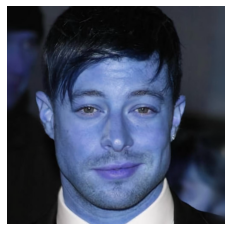

In [14]:
random_img_path = img_path+"\\"+str(int(random_id))+".jpg"
random_img = cv2.imread(random_img_path)
plt.axis('off')
plt.imshow(random_img)

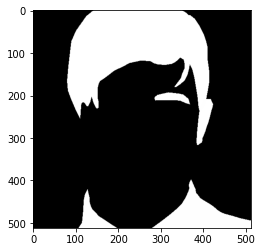

In [15]:
temp_img = part_imgs[0]

for img in part_imgs[:5]:
    
    temp_img = temp_img+img
    
plt.imshow(temp_img)
